In [26]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import re # regular expressions
import os # Operation System
from datetime import datetime

import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import sys

import warnings
warnings.filterwarnings("ignore")

from textblob import TextBlob

import spacy

In [ ]:
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 827.9 MB 1.4 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=4d99b7024ca6c7c4d5f40175143d972f413b7bbaa0c38703fe241d868d0c242e
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dg8mz31/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# Load SpaCy model
nlp = spacy.load("en_core_web_lg")

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
dataPath = "/content/drive/MyDrive/NLP/"

In [29]:
df = pd.read_csv(dataPath+'cleaned_df_topics.csv')
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,date,language,title,text,cleaned_text,topic_1,topic_2,text_without_stopwords,w1,w2,sentiment
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,16,-1,chicago ap chicago school leaders canceled cla...,0.995696,0.000000,0
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,16,-1,chicago ap chicago school leaders canceled cla...,0.995942,0.000000,0
2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,12,9,chicago pd lies season episode promo voight em...,0.548833,0.194461,1
3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,7,16,wise foolish chicago tribune article titled ch...,0.506048,0.253361,0
4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,12,7,neighbors near mashawn plummer portage park fi...,0.628751,0.277253,1
...,...,...,...,...,...,...,...,...,...,...,...
183315,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...,7,0,authorities say girl shot head stray bullet th...,0.683487,0.044752,0
183316,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...,17,3,seed loyola chicago ramblers mvc point favorit...,0.519437,0.462224,1
183317,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...,4,1,remember check draftkings illinois page find d...,0.534763,0.423974,0
183318,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,blockshopper com buyer address valuatio...,16,-1,blockshopper com buyer address valuation jenni...,0.961049,0.000000,1


In [ ]:
df['topic_1'].value_counts()

7     32451
3     29239
12    27261
1     18552
0     18459
4     14198
16     8630
11     5155
10     5052
2      4739
17     4575
8      3522
9      3429
15     2411
14     1919
5      1484
13     1214
6      1030
Name: topic_1, dtype: int64

In [ ]:
# choose related topic
# topic 0, 1, 7, 10 , 16
lst = [0, 1, 7, 10, 16]
res = []
for i in lst:
  topic = df[df['topic_1'] == i].reset_index(drop=True)
  for j in range(topic.shape[0]):
    text = topic['text'][j]
    topic_num = i
    weight = topic['w1'][j]
    row = [topic_num, text, weight]
    res.append(row)

In [ ]:
res = pd.DataFrame(res, columns=['topic', 'text', 'weight'])
res = res[res['weight'] >= 0.9].reset_index(drop=True)

In [ ]:
res

,topic,text,weight
0,0,Join one of the nation’s most comprehensive ac...,0.948747
1,0,Neurohospitalist opening in Chicago suburbs - ...,0.939231
2,0,eMarketingSilo\nDescription\nOrganizational Ov...,0.996609
3,0,Project Intake Manager\nThe Project Intake Man...,0.996781
4,0,Psychiatric Travel Nurse Job in Peoria Illinoi...,0.915215
...,...,...,...
21649,16,[BlockShopper.com] .\n|Buyer||Address||Sale Pr...,0.962568
21650,16,Chicagoans should definitely come eat here. De...,0.925158
21651,16,\nChicago Mayor Lori Lightfoot has called the ...,0.992216
21652,16,An Illinois judge has issued a temporary restr...,0.911900


### Try SpaCy

In [ ]:
## find org and person list
result_org = []
result_person = []
for i in range(res.shape[0]):
    print("Current i:", i)
    text = res['text'][i]
    text = re.sub("\\n", "", text)
    pattern = "((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
    text = re.sub(pattern, ' ', text)
    doc = nlp(text)

    entities = []
    labels = []
    position_start = []
    position_end = []

    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        position_start.append(ent.start_char)
        position_end.append(ent.end_char)

    tmp = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

    orgs = tmp[tmp['Labels'] == 'ORG']

    persons = tmp[tmp['Labels'] == 'PERSON']

    for en in orgs['Entities']:
        result_org.append(en)

    for p in persons['Entities']:
        result_person.append(p)


#### Find the top organizations

In [ ]:
# Lowercase all words (default_stopwords are lowercase too)
# result = [word.lower() for word in result]

#fdist_text_spacy = nltk.FreqDist(result_person)
fdist_text_spacy = nltk.FreqDist(result_org)

print(fdist_text_spacy)

#fdist.items() #- will give all words
fdist_text_spacy.most_common(20)

<FreqDist with 30056 samples and 324438 outcomes>


[('Illinois Tool Works', 29483),
 ('NYSE', 9695),
 ('ITW', 6909),
 ('Illinois Tool Works Inc.', 5707),
 ('the industrial products company’s', 4994),
 ('SEC', 4851),
 ('Morgan Stanley', 3369),
 ('AP', 2559),
 ('Automotive OEM', 2474),
 ('the Securities & Exchange Commission', 2220),
 ('MarketBeat', 2160),
 ('the Securities and Exchange Commission', 1859),
 ('Specialty Products', 1809),
 ('the Chicago Teachers Union', 1802),
 ('COVID', 1703),
 ('CBS', 1636),
 ('Chicago News Videos', 1592),
 ('Deutsche Bank Aktiengesellschaft', 1567),
 ('Twitter', 1523),
 ('Illinois Municipal Retirement Fund', 1495)]

In [ ]:
text_list_spacy, text_freq_spacy = zip(*fdist_text_spacy.items())
text_list_spacy = list(text_list_spacy)
text_freq_spacy = list(text_freq_spacy)

In [ ]:
text_spacy_org = pd.DataFrame(list(zip(text_list_spacy, text_freq_spacy)), 
                                columns=['SpaCy_Entities', 'SpaCy_Count']).sort_values(by=['SpaCy_Count'], ascending=False).reset_index(drop=True)

In [ ]:
text_spacy_org.loc[text_spacy_org["SpaCy_Entities"] == "the Securities and Exchange Commission", "SpaCy_Entities"] = "SEC"
text_spacy_org.loc[text_spacy_org["SpaCy_Entities"] == "the Securities & Exchange Commission", "SpaCy_Entities"] = "SEC"
text_spacy_org.loc[text_spacy_org["SpaCy_Entities"] == "ITW", "SpaCy_Entities"] = "Illinois Tool Works"
text_spacy_org.loc[text_spacy_org["SpaCy_Entities"] == "Illinois Tool Works Inc.", "SpaCy_Entities"] = "Illinois Tool Works"

In [ ]:
org_cnt = text_spacy_org.groupby(by=['SpaCy_Entities']).sum().sort_values(by=['SpaCy_Count'], ascending=False).reset_index()

In [ ]:
org_cnt.head(20)

,SpaCy_Entities,SpaCy_Count
0,Illinois Tool Works,42099
1,NYSE,9695
2,SEC,8930
3,the industrial products company’s,4994
4,Morgan Stanley,3369
5,AP,2559
6,Automotive OEM,2474
7,MarketBeat,2160
8,Specialty Products,1809
9,the Chicago Teachers Union,1802


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

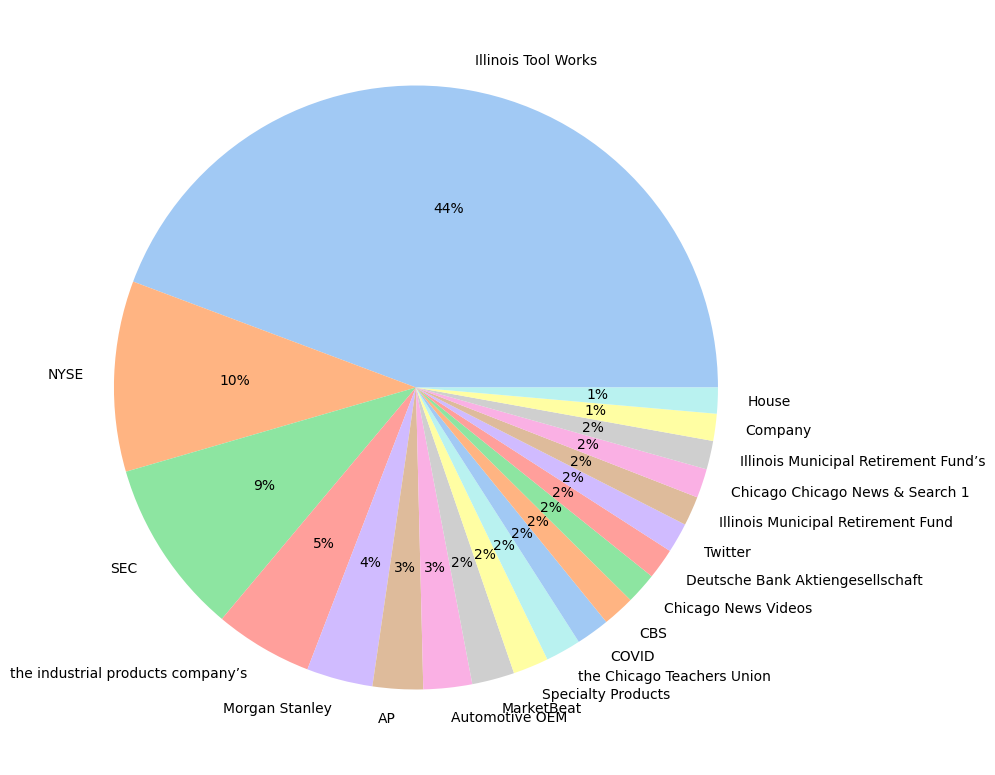

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
y = org_cnt['SpaCy_Count']
mylabels = list(org_cnt['SpaCy_Entities'])

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:21]

#create pie chart
ax = plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor=(.5, 1),
#     frameon=False
# )
#plt.legend(loc='right', title='Org')
plt.show()

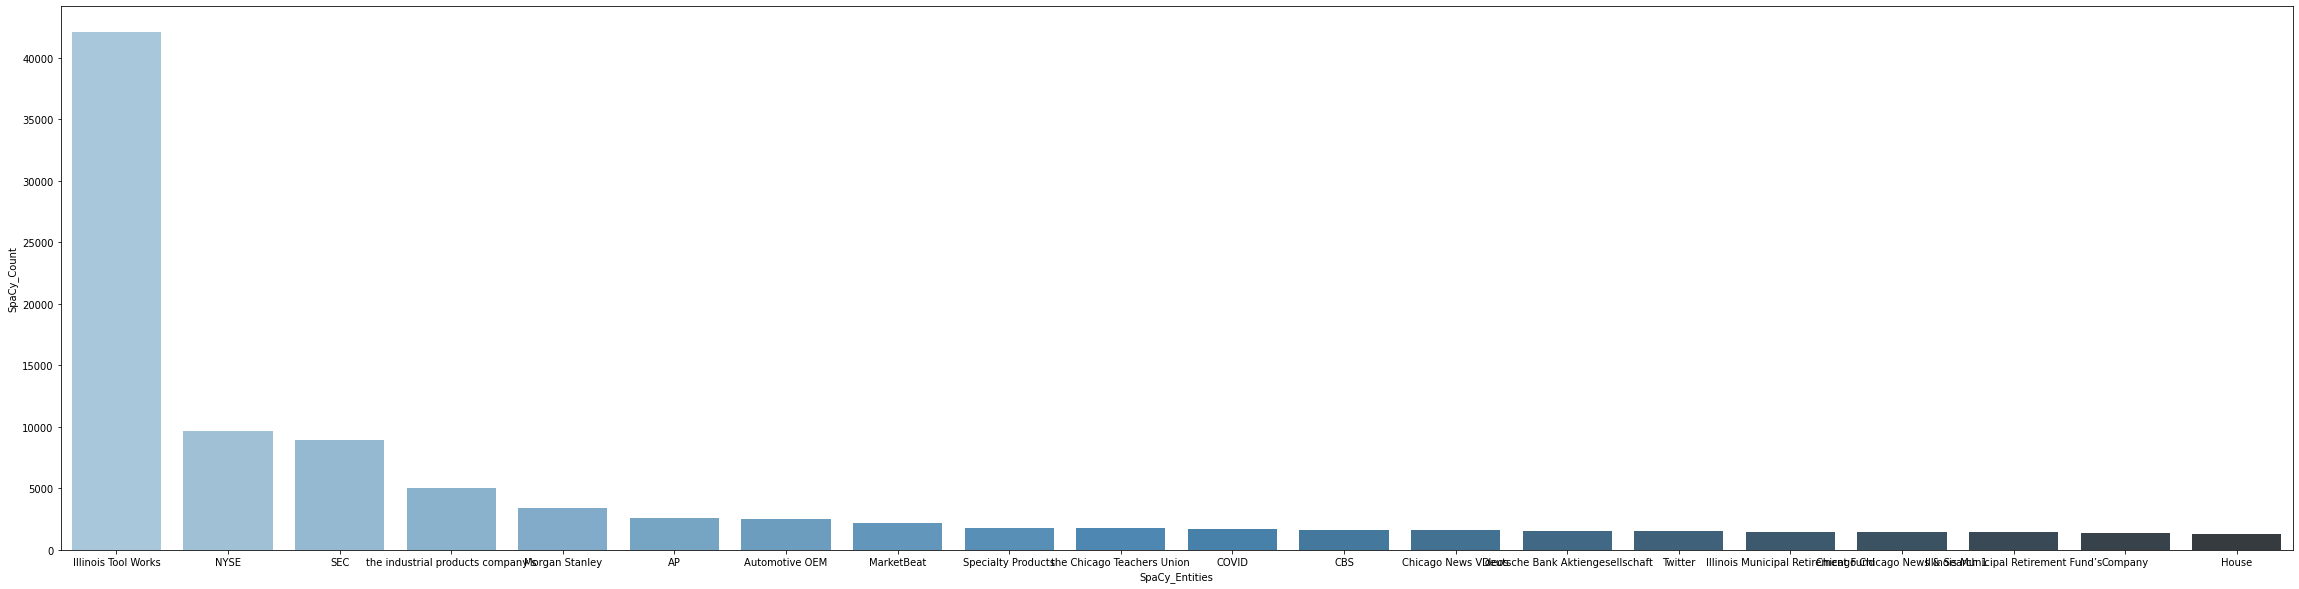

In [ ]:
plt.gcf().set_size_inches(40, 10)
ax = sns.barplot(x="SpaCy_Entities", y="SpaCy_Count", data=org_cnt,
                 palette="Blues_d")

In [ ]:
text_spacy_org.to_pickle(dataPath + 'text_spacy_org.pkl')

In [ ]:
text_spacy_org = pd.read_pickle(dataPath + 'text_spacy_org.pkl')

#### Find the top person name

In [ ]:
# Lowercase all words (default_stopwords are lowercase too)
# result = [word.lower() for word in result]

fdist_text_spacy = nltk.FreqDist(result_person)

print(fdist_text_spacy)

#fdist.items() #- will give all words
fdist_text_spacy.most_common(20)

<FreqDist with 15586 samples and 123183 outcomes>


[('Lightfoot', 4230),
 ('Lori Lightfoot', 2606),
 ('Van Dyke', 2111),
 ('Madigan', 1773),
 ('Pritzker', 1685),
 ('Maria', 1547),
 ('Alvarez', 1309),
 ('Smollett', 1288),
 ('Jesse Sharkey', 1212),
 ('Pedro Martinez', 1169),
 ('Ernest Scott Santi', 1164),
 ('Foxx', 1062),
 ('Brown', 1015),
 ('Sharkey', 944),
 ('J.B. Pritzker', 858),
 ('Jason Van Dyke', 758),
 ('Sullivan', 712),
 ('Martinez', 696),
 ('David Brown', 693),
 ('Sophia Tareen', 605)]

In [ ]:
text_list_spacy, text_freq_spacy = zip(*fdist_text_spacy.items())
text_list_spacy = list(text_list_spacy)
text_freq_spacy = list(text_freq_spacy)

In [ ]:
text_spacy_person = pd.DataFrame(list(zip(text_list_spacy, text_freq_spacy)), 
                                columns=['SpaCy_Entities', 'SpaCy_Count']).sort_values(by=['SpaCy_Count'], ascending=False).reset_index(drop=True)

In [ ]:
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Lightfoot", "SpaCy_Entities"] = "Lori Lightfoot"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Sharkey", "SpaCy_Entities"] = "Jesse Sharkey"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Van Dyke", "SpaCy_Entities"] = "Jason Van Dyke"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Dyke", "SpaCy_Entities"] = "Jason Van Dyke"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Brown", "SpaCy_Entities"] = "David Brown"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Martinez", "SpaCy_Entities"] = "Pedro Martinez"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Pritzker", "SpaCy_Entities"] = "J.B. Pritzker"
text_spacy_person.loc[text_spacy_person["SpaCy_Entities"] == "Foxx", "SpaCy_Entities"] = "Kim Foxx"

In [ ]:
per_cnt = text_spacy_person.groupby(by=['SpaCy_Entities']).sum().sort_values(by=['SpaCy_Count'], ascending=False).head(20).reset_index()

In [ ]:
per_cnt

,SpaCy_Entities,SpaCy_Count
0,Lori Lightfoot,6836
1,Jason Van Dyke,2898
2,J.B. Pritzker,2543
3,Jesse Sharkey,2156
4,Pedro Martinez,1865
5,Madigan,1773
6,David Brown,1708
7,Kim Foxx,1595
8,Maria,1547
9,Alvarez,1309


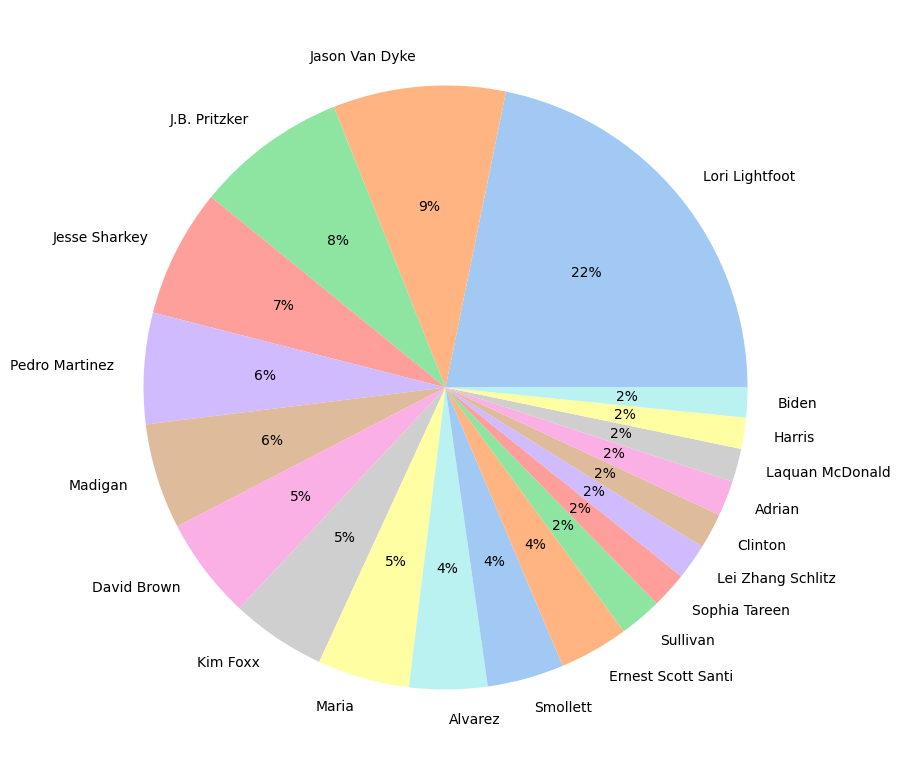

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
y = per_cnt['SpaCy_Count']
mylabels = list(per_cnt['SpaCy_Entities'])

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:21]

#create pie chart
ax = plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
# sns.move_legend(
#     ax, "lower center",
#     bbox_to_anchor=(.5, 1),
#     frameon=False
# )
#plt.legend(loc='right', title='Org')
plt.show()

In [ ]:
text_spacy_person.to_pickle(dataPath + 'text_spacy_person.pkl')

In [ ]:
text_spacy_person = pd.read_pickle(dataPath + 'text_spacy_person.pkl')

#### Find orgs and person with corresponding text

In [ ]:
combined_result = []
for i in range(res.shape[0]):
    result_org = []
    result_person = []
    print("Current i:", i)
    text = res['text'][i]
    text = re.sub("\\n", "", text)
    pattern = "((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
    text = re.sub(pattern, ' ', text)
    doc = nlp(text)

    entities = []
    labels = []
    position_start = []
    position_end = []

    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        position_start.append(ent.start_char)
        position_end.append(ent.end_char)

    tmp = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

    orgs = tmp[tmp['Labels'] == 'ORG']

    persons = tmp[tmp['Labels'] == 'PERSON']

    for en in orgs['Entities']:
        result_org.append(en)

    for p in persons['Entities']:
        result_person.append(p)

    combined_result.append([res['text'][i], result_org, result_person])

In [ ]:
text_spacy = pd.DataFrame(combined_result, columns=['text', 'Orgs', 'Person'])

In [ ]:
text_spacy.tail(20)

,text,Orgs,Person
21634,CHICAGO (AP) — Students are poised to return t...,"[AP, the teachers union, Chicago Teachers Unio...","[Lori Lightfoot, Jesse Sharkey, Jesse Sharkey,..."
21635,Block Club spoke to parents across the city. S...,[Block Club],[]
21636,Chicago (AP) —Private negotiations on Saturday...,"[AP, the Chicago Teachers Union, COVID, | Top,...","[Lori Lightfoot, Lightfoot, Jesse Sharkey, Lig..."
21637,Chicagoans should definitely come eat here. De...,[Lincoln Park],[BYOB]
21638,"By Theresa Waldrop and Omar Jimenez, CNN\nThe ...","[Chicago Teachers Union, Omicron, CNN, Omicron...","[Theresa Waldrop, Omar Jimenez, Stacy Davis Ga..."
21639,[News]\n[Pandemic &nbsp]\nChicago Cancels Scho...,"[News][Pandemic &nbsp]Chicago, Cancels School,...","[Pedro Martinez, Lori Lightfoot, Chris Geovani..."
21640,Photo: Getty Images\nA dispute over COVID safe...,"[Getty, COVID, the Chicago Teachers Union, Omi...","[Jesse Sharkey, Lori Lightfoot, Barrera Tobón]"
21641,Virtual 'walkout': Chicago teachers vote for r...,"[students[Grace Hauck]CHICAGO, Chicago Teacher...","[Lori Lightfoot, Pedro Martinez, Lightfoot, Ma..."
21642,Chicago — Students from several Chicago Public...,"[Solorio Academy High School, the Youth Allian...",[]
21643,A majority of Chicago teachers voted to refuse...,"[COVID, COVID, COVID, Curie Metropolitan High ...","[Pedro Martinez, Lori Lightfoot, Lightfoot, Je..."


In [ ]:
text_spacy.to_pickle(dataPath + 'text_spacy.pkl')

In [ ]:
text_spacy = pd.read_pickle(dataPath + 'text_spacy.pkl')

#### Find orgs, person with corresponding sentence

In [ ]:
result_org_sent = []
result_person_sent = []
for i in range(res.shape[0]):
    print("Current i:", i)
    text = res['text'][i]
    text = re.sub("\\n", "", text)
    pattern = "((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
    text = re.sub(pattern, ' ', text)
    doc = nlp(text)

    entities = []
    labels = []
    sents = []

    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        sents.append(ent.sent.text)

    tmp = pd.DataFrame({'Entities':entities,'Labels':labels, 'Sentence':sents})

    orgs = tmp[tmp['Labels'] == 'ORG']

    persons = tmp[tmp['Labels'] == 'PERSON']

    for j in range(orgs.shape[0]):
        result_org_sent.append(orgs.iloc[j])

    for j in range(persons.shape[0]):
        result_person_sent.append(persons.iloc[j])

    # for en in orgs['Entities']:
    #     result_org.append(en)

    # for p in persons['Entities']:
    #     result_person.append(p)


In [ ]:
result_org_sent = pd.DataFrame(result_org_sent).reset_index(drop=True)

In [ ]:
result_org_sent

,Entities,Labels,Sentence
0,UChicago Medicine,ORG,Join one of the nation’s most comprehensive ac...
1,the University of Chicago Medicine,ORG,Our staff are encouraged to achieve their care...
2,the Respiratory Therapist,ORG,"this role, the Respiratory Therapist administe..."
3,The Respiratory Therapist,ORG,The Respiratory Therapist initiates and mainta...
4,Small Volume Nebulizer,ORG,Administers supplemental oxygen/medical gas th...
...,...,...,...
324433,NBC,ORG,"""We haven't sat idly by and let COVID race thr..."
324434,Meet the Press,ORG,"""We haven't sat idly by and let COVID race thr..."
324435,Sangamon County Circuit,ORG,Sangamon County Circuit Judge Raylene Grischow...
324436,Void,ORG,“This court acknowledges the tragic toll the C...


In [ ]:
result_org_sent[result_org_sent['Entities'] == 'NBC']

,Entities,Labels,Sentence
5494,NBC,ORG,The divisions portfolio includes primary affil...
7704,NBC,ORG,"Previously, she was an anchor and reporter at ..."
23978,NBC,ORG,"Previously, she was an anchor and reporter at ..."
26556,NBC,ORG,"Previously, she was an anchor and reporter at ..."
41726,NBC,ORG,Get the NBC 5 Chicago app for iOS or Android a...
...,...,...,...
324129,NBC,ORG,"Lightfoot also called the union's action an ""i..."
324144,NBC,ORG,They abandoned their posts and they abandoned ...
324159,NBC,ORG,They abandoned their posts and they abandoned ...
324192,NBC,ORG,”Lightfoot criticized the Chicago Teacher’s Un...


In [ ]:
result_person_sent = pd.DataFrame(result_person_sent).reset_index(drop=True)

In [ ]:
result_person_sent

,Entities,Labels,Sentence
0,modalities.- Initiates,PERSON,Properly assesses the patient during administr...
1,Non-UnionMust,PERSON,Non-UnionMust comply with UCMC’s COVID-19 Vacc...
2,NAR,PERSON,NAR is certified as a Great Place to Work®.
3,NAR,PERSON,RespectCollaboratingCommunicatingLocation: Thi...
4,skills.-,PERSON,skills.-
...,...,...,...
123178,Lightfoot,PERSON,"""A day earlier, Lightfoot said she and Chicago..."
123179,Pedro Martinez,PERSON,"""A day earlier, Lightfoot said she and Chicago..."
123180,Lightfoot,PERSON,"""We haven't sat idly by and let COVID race thr..."
123181,Raylene Grischow,PERSON,Sangamon County Circuit Judge Raylene Grischow...


In [ ]:
result_org_sent.to_pickle(dataPath + 'result_org_sent.pkl')
result_person_sent.to_pickle(dataPath + 'result_person_sent.pkl')

In [ ]:
result_org_sent = pd.read_pickle(dataPath + 'result_org_sent.pkl')
result_person_sent = pd.read_pickle(dataPath + 'result_person_sent.pkl')

### Try NLTK

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = []
labels = []

for text in res['text']:
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False):
            if hasattr(chunk, 'label'):
                entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
                labels.append(chunk.label())

entities_labels = list(zip(entities, labels))
#entities_labels = list(set(zip(entities, labels))) #unique entities

In [ ]:
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities", "Labels"]
entities_df

,Entities,Labels
0,UChicago Medicine,ORGANIZATION
1,Adults,GPE
2,University,ORGANIZATION
3,Chicago,GPE
4,Bonus,PERSON
...,...,...
816465,James,PERSON
816466,Real Estate,ORGANIZATION
816467,Real Estate,ORGANIZATION
816468,Real Estate,ORGANIZATION


In [ ]:
entities_df.to_pickle(dataPath + 'nltk_result.pkl')

In [ ]:
text_nltk2 = entities_df[entities_df['Labels'] == 'PERSON']
text_nltk2 = text_nltk2.groupby(['Entities'])['Entities'].count().reset_index(name='count').sort_values(['count'], ascending=False)
text_nltk2.head(20)

,Entities,count
11409,Illinois,14943
11624,Illinois Tool Works,11874
14855,Lightfoot,4017
17553,Municipal Retirement Fund,2916
17318,Morgan,2721
23206,Stanley,2718
15192,Lori Lightfoot,2217
25682,Visit,2106
11713,Inc,1995
25395,Van Dyke,1950


### Target Sentiment Analysis

In [ ]:
### load pipeline
import pickle
pipe_svm = pickle.load(open(dataPath+'pipe_svm.pkl', 'rb'))
pipe_logreg = pickle.load(open(dataPath+'pipe_logreg.pkl', 'rb'))

In [ ]:
text_org = result_org_sent['Sentence']
text_person = result_person_sent['Sentence']

In [ ]:
%time text_org_pred = pipe_svm.predict(text_org)

CPU times: user 19.5 s, sys: 200 ms, total: 19.7 s
Wall time: 19.8 s


In [ ]:
%time text_person_pred = pipe_svm.predict(text_person)

CPU times: user 9.01 s, sys: 54.1 ms, total: 9.06 s
Wall time: 9.09 s


In [ ]:
%time text_org_pred_lg = pipe_logreg.predict(text_org)
text_person_pred_lg = pipe_logreg.predict(text_person)

CPU times: user 19.5 s, sys: 91.4 ms, total: 19.6 s
Wall time: 19.6 s


In [ ]:
%time text_org_prob_lg = pipe_logreg.predict_proba(text_org)
text_person_prob_lg = pipe_logreg.predict_proba(text_person)

CPU times: user 19.1 s, sys: 76.7 ms, total: 19.2 s
Wall time: 19.3 s


In [ ]:
text_org_prob_lg

array([[0.42809073, 0.57190927],
       [0.54388068, 0.45611932],
       [0.77331828, 0.22668172],
       ...,
       [0.90903435, 0.09096565],
       [0.87476649, 0.12523351],
       [0.67716043, 0.32283957]])

In [ ]:
text_org_prob_lg[:,0]

array([0.42809073, 0.54388068, 0.77331828, ..., 0.90903435, 0.87476649,
       0.67716043])

In [ ]:
text_org_neg = text_org_prob_lg[:,0]
text_org_pos = text_org_prob_lg[:,1]
text_person_neg = text_person_prob_lg[:,0]
text_person_pos = text_person_prob_lg[:,1]

In [ ]:
result_org_sent['Sentiment'] = text_org_pred_lg
result_person_sent['Sentiment'] = text_person_pred_lg
result_org_sent['Neg Prob'] = text_org_neg
result_org_sent['Pos Prob'] = text_org_pos
result_person_sent['Neg Prob'] = text_person_neg
result_person_sent['Pos Prob'] = text_person_pos

In [ ]:
result_org_sent['Sentiment'].value_counts()

0    271582
1     52856
Name: Sentiment, dtype: int64

In [ ]:
result_org_sent

,Entities,Labels,Sentence,Sentiment,Neg Prob,Pos Prob
0,UChicago Medicine,ORG,Join one of the nation’s most comprehensive ac...,1,0.428091,0.571909
1,the University of Chicago Medicine,ORG,Our staff are encouraged to achieve their care...,0,0.543881,0.456119
2,the Respiratory Therapist,ORG,"this role, the Respiratory Therapist administe...",0,0.773318,0.226682
3,The Respiratory Therapist,ORG,The Respiratory Therapist initiates and mainta...,0,0.898681,0.101319
4,Small Volume Nebulizer,ORG,Administers supplemental oxygen/medical gas th...,0,0.662929,0.337071
...,...,...,...,...,...,...
324433,NBC,ORG,"""We haven't sat idly by and let COVID race thr...",0,0.879724,0.120276
324434,Meet the Press,ORG,"""We haven't sat idly by and let COVID race thr...",0,0.879724,0.120276
324435,Sangamon County Circuit,ORG,Sangamon County Circuit Judge Raylene Grischow...,0,0.909034,0.090966
324436,Void,ORG,“This court acknowledges the tragic toll the C...,0,0.874766,0.125234


In [ ]:
result_person_sent

,Entities,Labels,Sentence,Sentiment,Neg Prob,Pos Prob
0,modalities.- Initiates,PERSON,Properly assesses the patient during administr...,0,0.649653,0.350347
1,Non-UnionMust,PERSON,Non-UnionMust comply with UCMC’s COVID-19 Vacc...,0,0.837497,0.162503
2,NAR,PERSON,NAR is certified as a Great Place to Work®.,1,0.085844,0.914156
3,NAR,PERSON,RespectCollaboratingCommunicatingLocation: Thi...,1,0.061011,0.938989
4,skills.-,PERSON,skills.-,0,0.696533,0.303467
...,...,...,...,...,...,...
123178,Lightfoot,PERSON,"""A day earlier, Lightfoot said she and Chicago...",0,0.769892,0.230108
123179,Pedro Martinez,PERSON,"""A day earlier, Lightfoot said she and Chicago...",0,0.769892,0.230108
123180,Lightfoot,PERSON,"""We haven't sat idly by and let COVID race thr...",0,0.879724,0.120276
123181,Raylene Grischow,PERSON,Sangamon County Circuit Judge Raylene Grischow...,0,0.909034,0.090966


In [ ]:
result_person_sent[result_person_sent['Entities'] == 'David Brown'].reset_index(drop=True)

,Entities,Labels,Sentence,Sentiment,Neg Prob,Pos Prob
0,David Brown,PERSON,The nation's and city's current social justice...,0,0.995624,0.004376
1,David Brown,PERSON,The nation's and city's current social justice...,0,0.995624,0.004376
2,David Brown,PERSON,The nation's and city's current social justice...,0,0.995624,0.004376
3,David Brown,PERSON,The nation's and city's current social justice...,0,0.995624,0.004376
4,David Brown,PERSON,The nation's and city's current social justice...,0,0.995624,0.004376
...,...,...,...,...,...,...
688,David Brown,PERSON,David Brown said the teen was “charged with on...,0,0.933737,0.066263
689,David Brown,PERSON,Chicago Police Superintendent David Brown said...,0,0.785054,0.214946
690,David Brown,PERSON,Judge Wood also found that Tinch directed an i...,1,0.130845,0.869155
691,David Brown,PERSON,David Brown was expected to come to a decision...,0,0.927859,0.072141


In [ ]:
person_sent_cnt = pd.DataFrame(result_person_sent.groupby(by=['Entities', 'Sentiment'])['Sentiment'].count()).rename(columns={"Sentiment":"count"}).reset_index().sort_values(by=['count', 'Entities', 'Sentiment'], ascending=False)

In [ ]:
per = list(per_cnt['SpaCy_Entities'])[0:10]

In [ ]:
top15_result_per = pd.DataFrame(columns=['Entities', 'Sentiment', 'count'])
for p in per:
  tmp_df = person_sent_cnt[person_sent_cnt['Entities'] == p]
  top15_result_per = pd.concat([top15_result_per, tmp_df])

In [ ]:
pd.DataFrame(top15_result_per.groupby(by=['Entities', 'Sentiment'])['count'].sum()).reset_index()

,Entities,Sentiment,count
0,Alvarez,0,1106
1,Alvarez,1,203
2,David Brown,0,622
3,David Brown,1,71
4,J.B. Pritzker,0,788
5,J.B. Pritzker,1,70
6,Jason Van Dyke,0,696
7,Jason Van Dyke,1,62
8,Jesse Sharkey,0,950
9,Jesse Sharkey,1,262


<Figure size 1440x720 with 0 Axes>

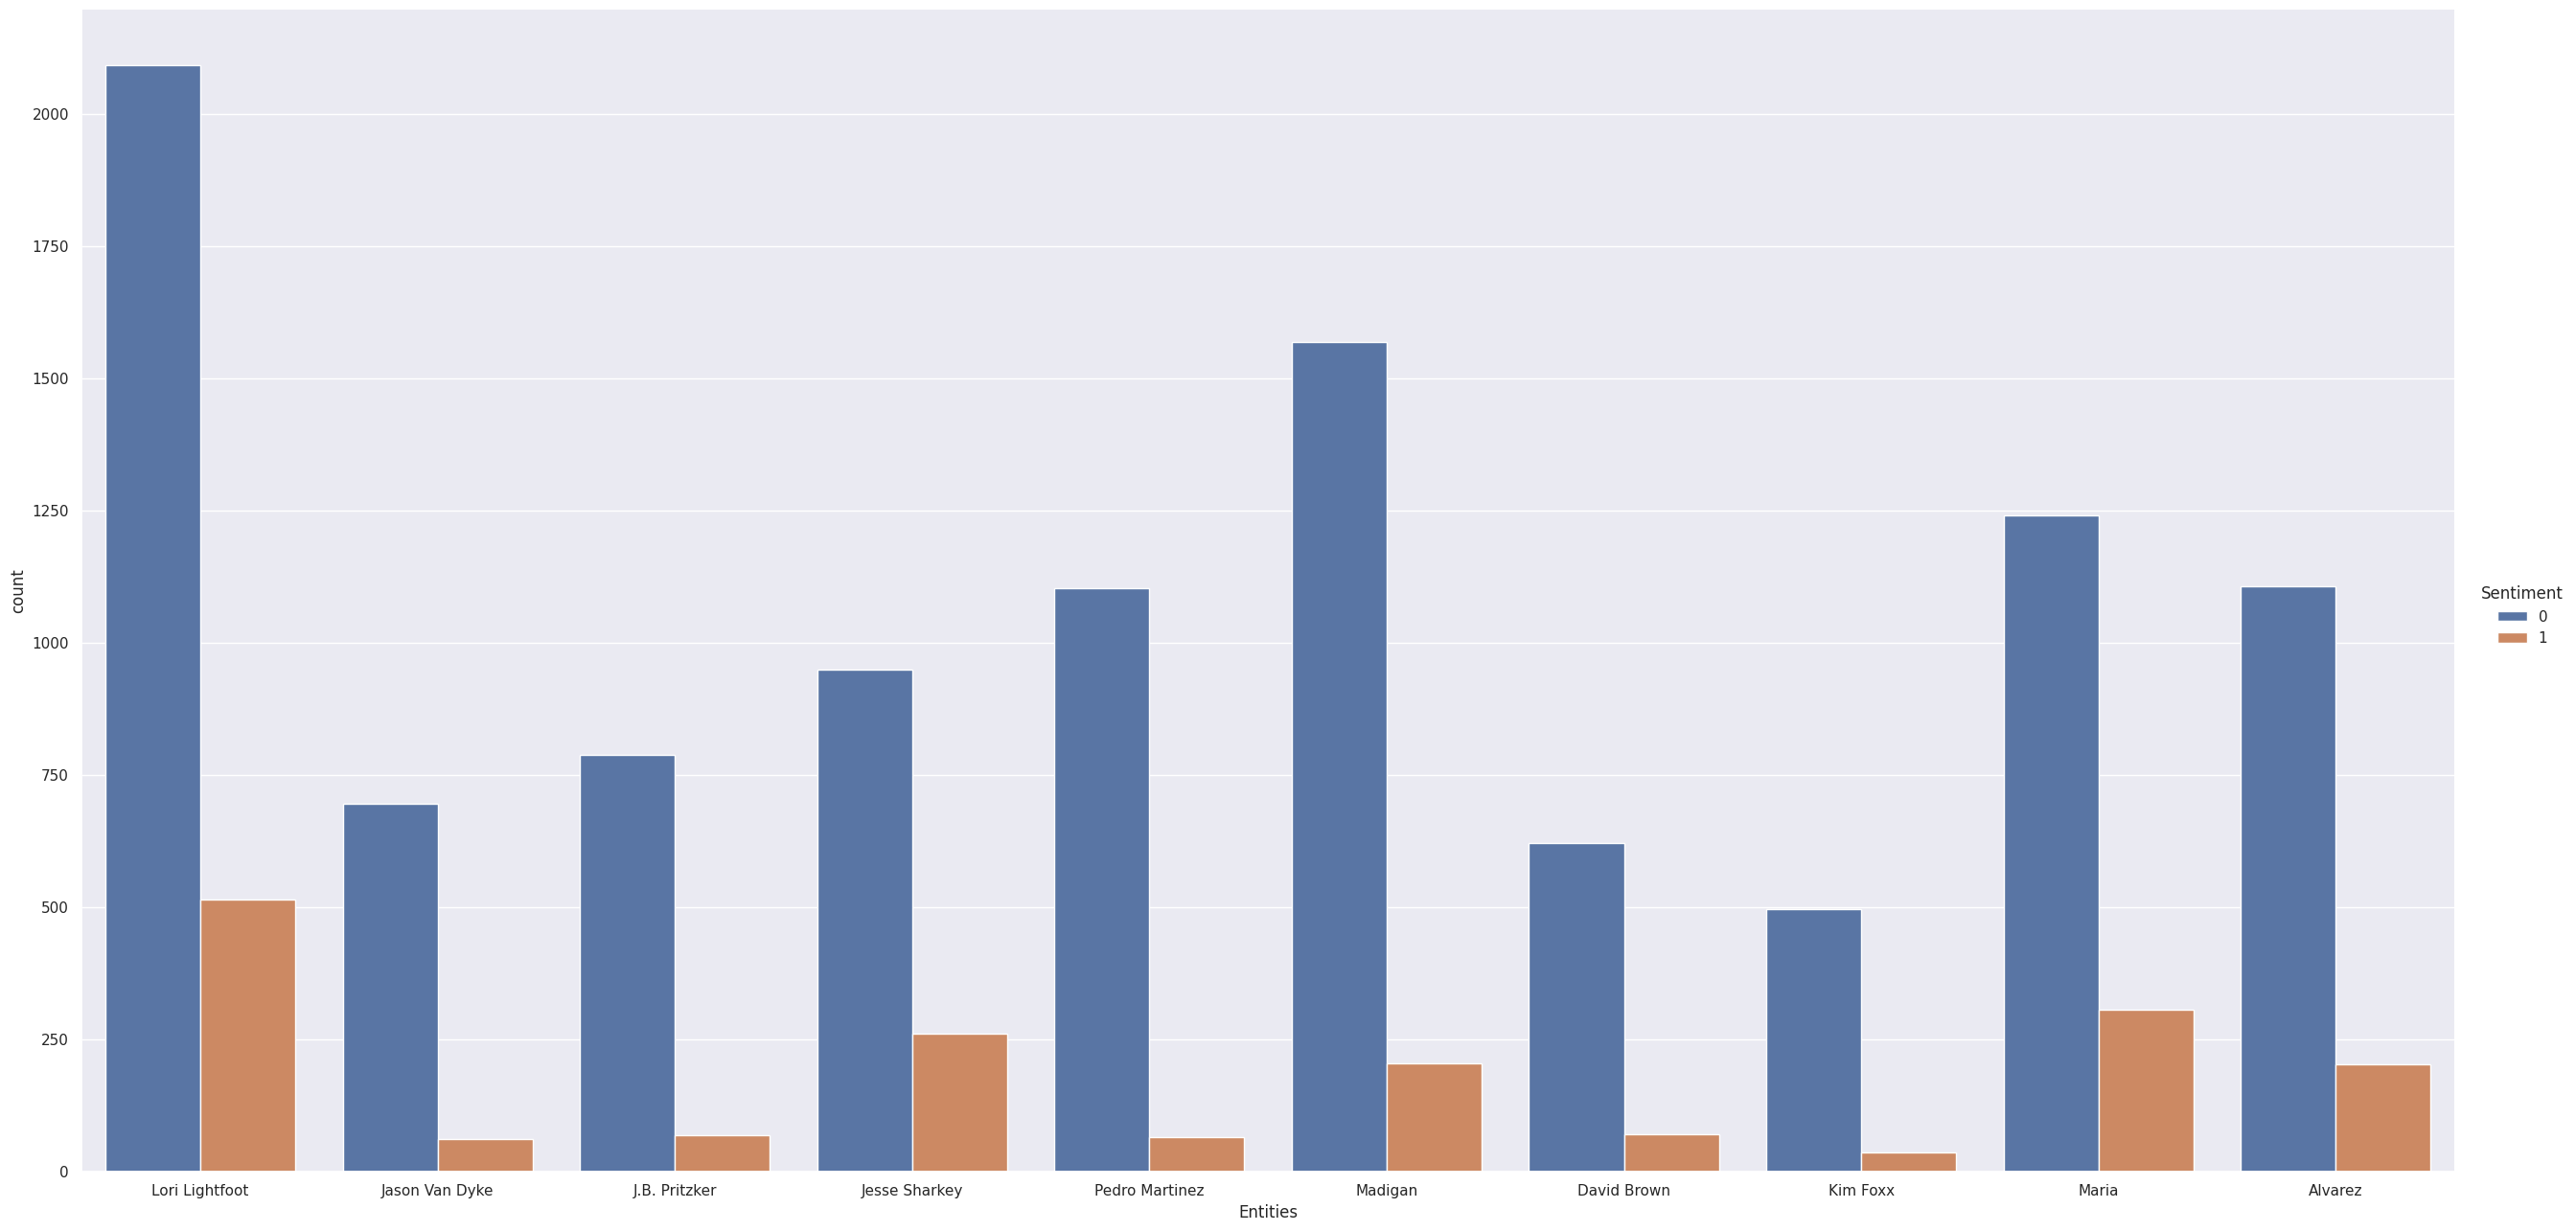

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
#plt.rcParams["figure.figsize"] = (18,10)
#plt.figure(figsize=(15,10))
plt.gcf().set_size_inches(20, 10)
fg = sns.factorplot(x='Entities', y='count', hue='Sentiment', data=top15_result_per, kind='bar', size=13, aspect=2)
fg.fig.set_dpi(100)

In [ ]:
org_sent_cnt = pd.DataFrame(result_org_sent.groupby(by=['Entities', 'Sentiment'])['Sentiment'].count()).rename(columns={"Sentiment":"count"}).reset_index().sort_values(by=['count', 'Entities', 'Sentiment'], ascending=False)

In [ ]:
list(org_cnt['SpaCy_Entities'])[0:40]

In [ ]:
orgs = ['Illinois Tool Works',
 'Morgan Stanley',
 'Automotive OEM',
 'the Chicago Teachers Union',
 'Illinois Municipal Retirement Fund',
 'House',
 'CPS',
 'Barclays',
 'Senate',
 'Zacks Investment Research']

In [ ]:
top15_result_org = pd.DataFrame(columns=['Entities', 'Sentiment', 'count'])
for o in orgs:
  tmp_df = org_sent_cnt[org_sent_cnt['Entities'] == o]
  top15_result_org = pd.concat([top15_result_org, tmp_df])

In [ ]:
pd.DataFrame(top15_result_org.groupby(by=['Entities', 'Sentiment'])['count'].sum()).reset_index()

,Entities,Sentiment,count
0,Automotive OEM,0,1078
1,Automotive OEM,1,1396
2,Barclays,0,1242
3,Barclays,1,2
4,CPS,0,1185
5,CPS,1,71
6,House,0,988
7,House,1,330
8,Illinois Municipal Retirement Fund,0,1439
9,Illinois Municipal Retirement Fund,1,56


In [ ]:
import seaborn as sns
sns.set(style='ticks')

<Figure size 1440x720 with 0 Axes>

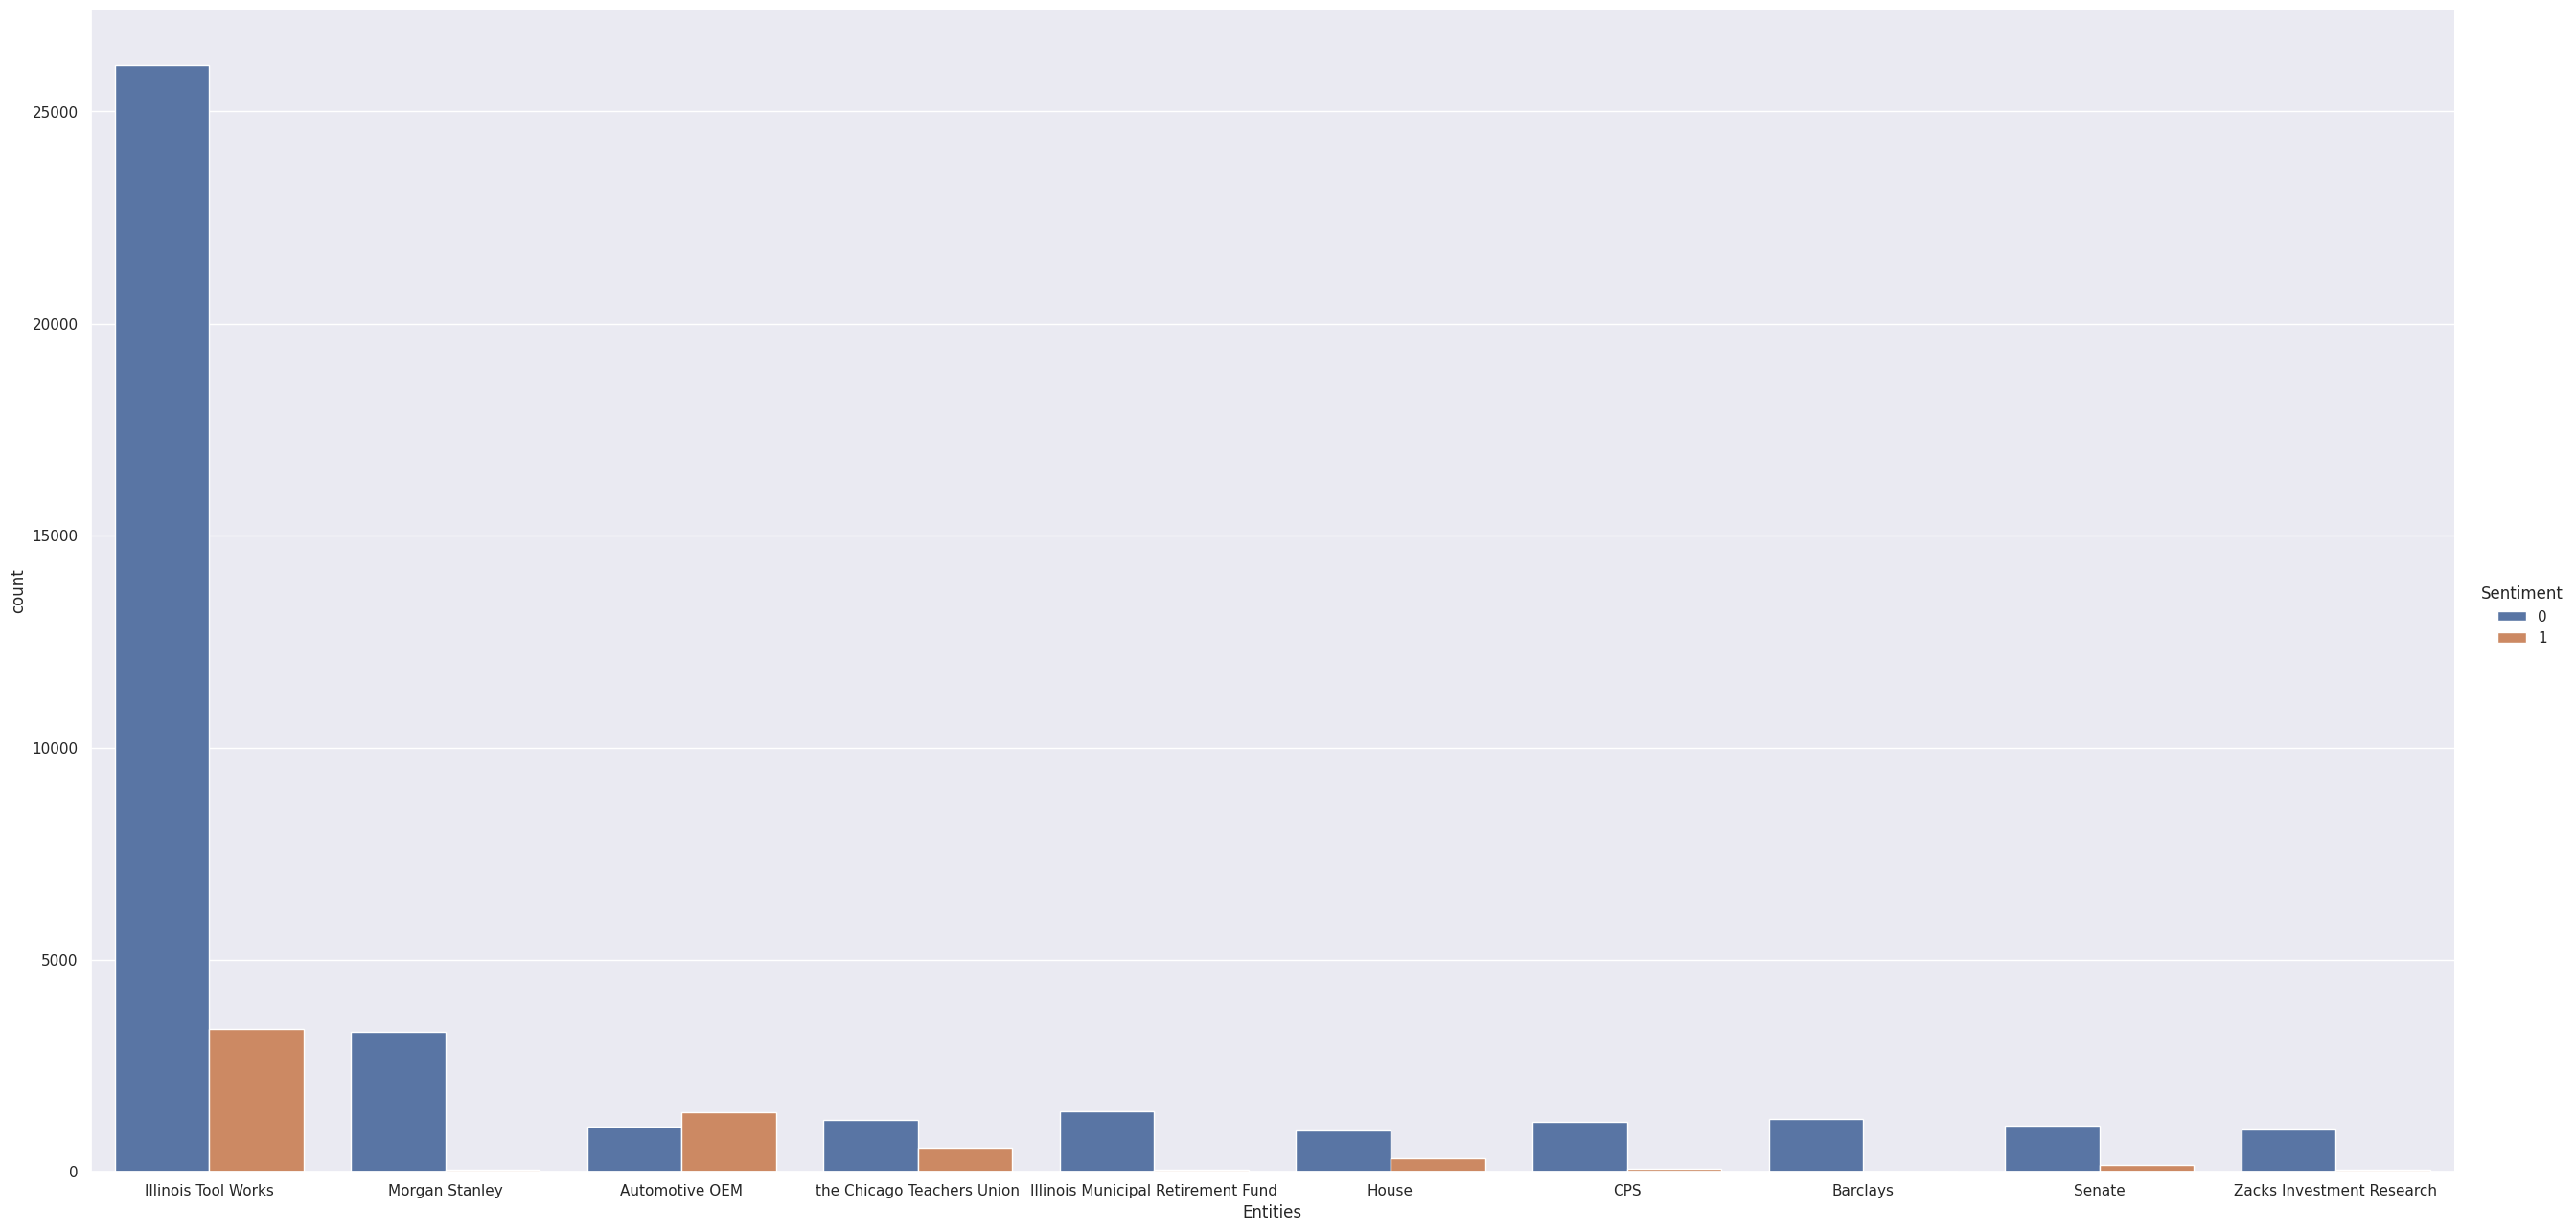

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
#plt.rcParams["figure.figsize"] = (18,10)
#plt.figure(figsize=(15,10))
plt.gcf().set_size_inches(20, 10)
fg = sns.factorplot(x='Entities', y='count', hue='Sentiment', data=top15_result_org, kind='bar', size=13, aspect=2)
fg.fig.set_dpi(100)

### Aspect based sentiment analysis

In [ ]:
pip install aspect-based-sentiment-analysis

In [ ]:
import aspect_based_sentiment_analysis as absa

nlp = absa.load()

Some layers from the model checkpoint at absa/classifier-rest-0.2 were not used when initializing BertABSClassifier: ['dropout_379']
- This IS expected if you are initializing BertABSClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertABSClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of BertABSClassifier were not initialized from the model checkpoint at absa/classifier-rest-0.2 and are newly initialized: ['dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tmp = result_org_sent[result_org_sent['Entities'] == 'Illinois Tool Works'].reset_index(drop=True)

In [ ]:
tmp

,Entities,Labels,Sentence,Sentiment,Neg Prob,Pos Prob
0,Illinois Tool Works,ORG,"Henkel, Sika, Bostik, RPM International, KCC, ...",0,0.557564,0.442436
1,Illinois Tool Works,ORG,] Illinois Tool Works: Q4 Earnings Snapshot –,0,0.553530,0.446470
2,Illinois Tool Works,ORG,Five analysts have provided estimates for Illi...,1,0.240477,0.759523
3,Illinois Tool Works,ORG,Illinois Tool Works reported sales of $3.48 bi...,0,0.813055,0.186945
4,Illinois Tool Works,ORG,The business is scheduled to announce its next...,0,0.977606,0.022394
...,...,...,...,...,...,...
29478,Illinois Tool Works,ORG,Bank of America dropped their target price on ...,0,0.972264,0.027736
29479,Illinois Tool Works,ORG,Morgan Stanley upped their price objective on ...,0,0.864331,0.135669
29480,Illinois Tool Works,ORG,"Finally, Wells Fargo & Company upped their pri...",0,0.831376,0.168624
29481,Illinois Tool Works,ORG,"Based on data from , Illinois Tool Works has ...",0,0.758821,0.241179


In [ ]:
absa_result = []
for i in range(tmp.shape[0]):
    print("Current i:", i)
    sent = tmp['Sentence'][i]
    result = nlp(sent, aspects=['Illinois Tool Works'])
    absa_result.append([sent, list(result.subtasks['Illinois Tool Works'].scores)])

In [ ]:
itw_result = pd.DataFrame(absa_result).rename(columns={0:"sentence", 1:"score"})

In [ ]:
itw_result['sentiment'].value_counts()

1    767
0    343
Name: sentiment, dtype: int64

In [ ]:
sentiment = []
for i in range(itw_result.shape[0]):
  score = itw_result['score'][i]
  neg = score[0]
  pos = score[2]
  if pos >= neg:
    sentiment.append(1)
  else:
    sentiment.append(0)

In [ ]:
itw_result['sentiment'] = sentiment

In [ ]:
itw_result

,sentence,score,sentiment
0,"Henkel, Sika, Bostik, RPM International, KCC, ...","[0.003842097, 0.0012475062, 0.9949104]",1
1,] Illinois Tool Works: Q4 Earnings Snapshot –,"[0.11129689, 0.0034942888, 0.88520885]",1
2,Five analysts have provided estimates for Illi...,"[0.41533464, 0.0043354826, 0.5803299]",1
3,Illinois Tool Works reported sales of $3.48 bi...,"[0.008301846, 0.0017094022, 0.98998874]",1
4,The business is scheduled to announce its next...,"[0.794829, 0.02242639, 0.18274465]",0
...,...,...,...
1105,Ethic Inc. increased its position in Illinois ...,"[0.1160667, 0.01769952, 0.86623377]",1
1106,"Finally, Toronto Dominion Bank increased its p...","[0.5012358, 0.038848046, 0.4599162]",0
1107,Mission Wealth Management LP’s holdings in Ill...,"[0.09721793, 0.012036566, 0.8907455]",1
1108,O Shares Investment Advisers LLC grew its stak...,"[0.12977147, 0.007259454, 0.8629691]",1


In [ ]:
itw_result.to_pickle(dataPath + 'itw_result_absa.pkl')

In [ ]:
neg = itw_result[itw_result['sentiment'] == 1]

In [ ]:
neg = result_org_sent[result_org_sent['Sentiment'] == 1]

In [ ]:
words = wordcloud.STOPWORDS.union(set(result_org_sent['Entities']))

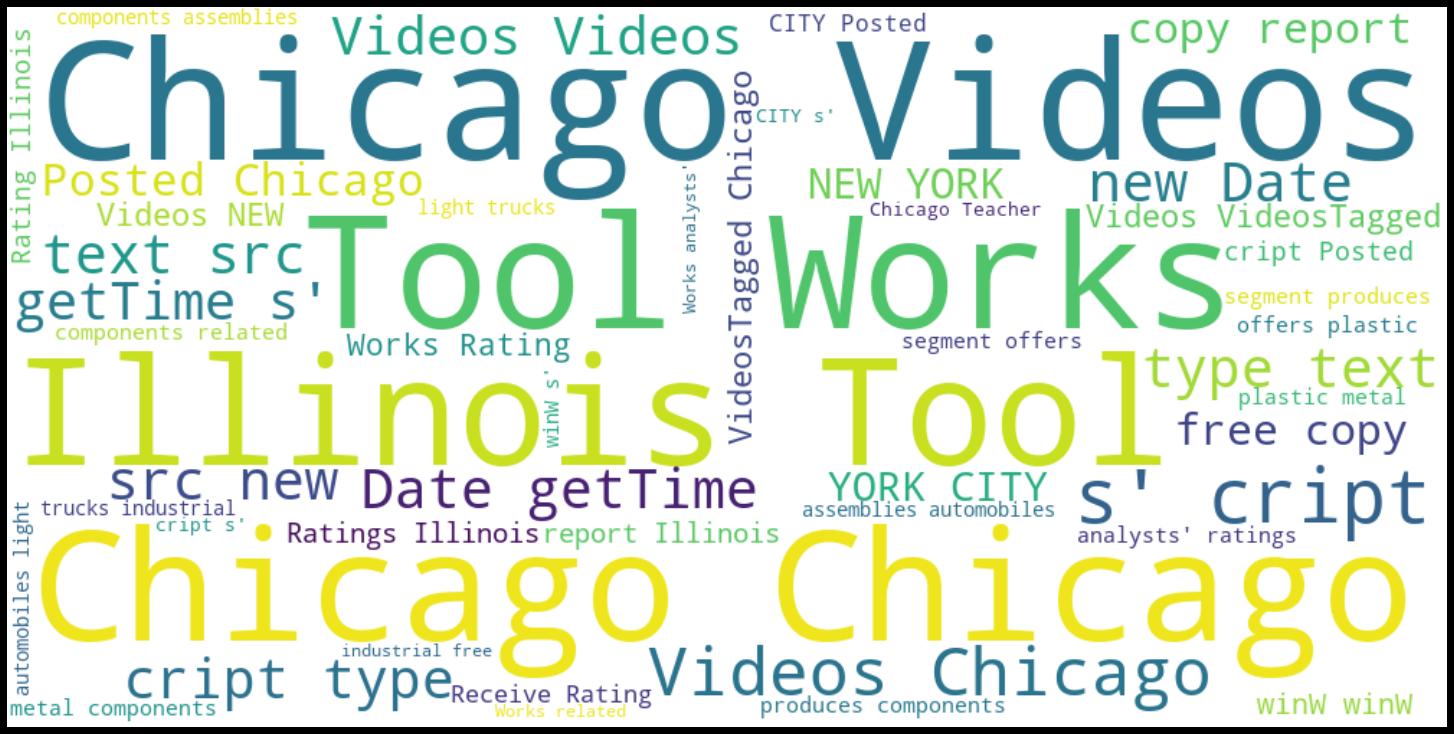

In [ ]:
import wordcloud
import matplotlib.pyplot as plt


data = " ".join(neg['Sentence'])

wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=50,
    stopwords = words)

#wordcloud_obj.generate_from_frequencies(data)
wordcloud_obj.generate(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
tmp2 = result_person_sent[result_person_sent['Entities'] == 'Lightfoot'].reset_index(drop=True)

In [ ]:
tmp2

,Entities,Labels,Sentence,Sentiment,Neg Prob,Pos Prob
0,Lightfoot,PERSON,CHICAGO (CBS 58) -- Chicago is one step closer...,0,0.755815,0.244185
1,Lightfoot,PERSON,"""A city casino signals to the world that our e...",1,0.127747,0.872253
2,Lightfoot,PERSON,’s been close to three years since state legis...,0,0.533625,0.466375
3,Lightfoot,PERSON,Lightfoot administration estimates that a new ...,0,0.554844,0.445156
4,Lightfoot,PERSON,The two proposals that were rejected were from...,0,0.875638,0.124362
...,...,...,...,...,...,...
4225,Lightfoot,PERSON,The district has said it is taking additional ...,0,0.621536,0.378464
4226,Lightfoot,PERSON,"New York Mayor Eric Adams, Lightfoot has pushe...",0,0.520496,0.479504
4227,Lightfoot,PERSON,She said Lightfoot and the district need to do...,0,0.728541,0.271459
4228,Lightfoot,PERSON,"""A day earlier, Lightfoot said she and Chicago...",0,0.769892,0.230108


In [ ]:
absa_result2 = []
for i in range(tmp2.shape[0]):
    print("Current i:", i)
    sent = tmp2['Sentence'][i]
    result = nlp(sent, aspects=['Lightfoot'])
    absa_result2.append([sent, list(result.subtasks['Lightfoot'].scores)])

In [ ]:
lightfoot_result = pd.DataFrame(absa_result2).rename(columns={0:"sentence", 1:"score"})

In [ ]:
lightfoot_result

,sentence,score,sentiment
0,CHICAGO (CBS 58) -- Chicago is one step closer...,"[0.050318062, 0.8267901, 0.12289188]",1
1,"""A city casino signals to the world that our e...","[0.4882559, 0.44871983, 0.063024335]",0
2,’s been close to three years since state legis...,"[0.29124725, 0.6985253, 0.010227481]",0
3,Lightfoot administration estimates that a new ...,"[0.758051, 0.068628, 0.17332098]",0
4,The two proposals that were rejected were from...,"[0.48773965, 0.23079708, 0.28146333]",0
...,...,...,...
1087,And after the city refused to release the poli...,"[0.36485422, 0.41674882, 0.21839699]",0
1088,"Not only that, but just as then-Mayor Rahm Ema...","[0.05824831, 0.89631003, 0.045441717]",0
1089,And after the city refused to release the poli...,"[0.34197176, 0.4237463, 0.23428196]",0
1090,", Lightfoot's administration tried to prevent ...","[0.043927934, 0.9388011, 0.017270999]",0


In [ ]:
sentiment2 = []
for i in range(lightfoot_result.shape[0]):
  score = lightfoot_result['score'][i]
  neg = score[0]
  pos = score[2]
  if pos >= neg:
    sentiment2.append(1)
  else:
    sentiment2.append(0)

In [ ]:
lightfoot_result['sentiment'] = sentiment2

In [ ]:
lightfoot_result.to_pickle(dataPath + 'lightfoot_result_absa.pkl')

In [ ]:
neg = lightfoot_result[itw_result['sentiment'] == 0]

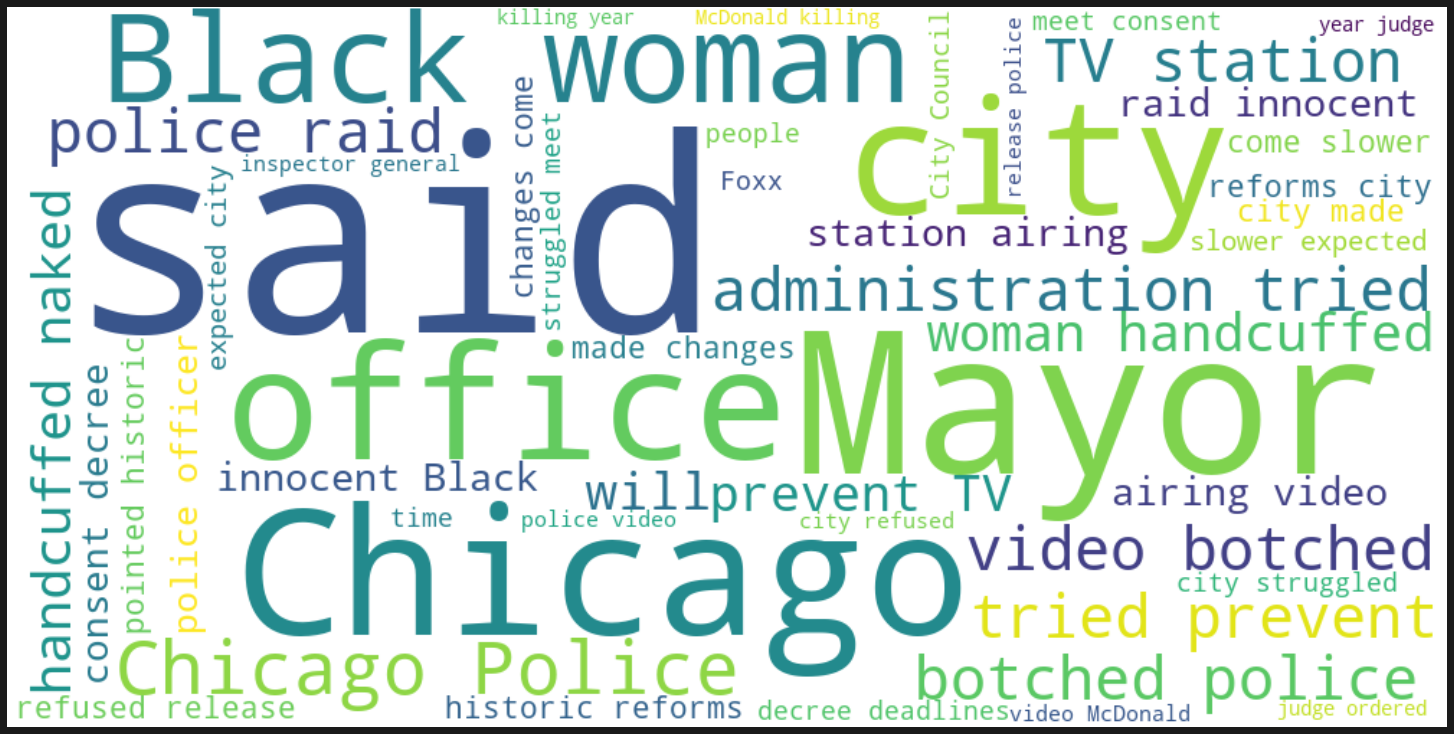

In [ ]:
data = " ".join(neg['sentence'])
data = re.sub("Lightfoot", "", data)
wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=50,
    stopwords = wordcloud.STOPWORDS)

#wordcloud_obj.generate_from_frequencies(data)
wordcloud_obj.generate(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()